In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Tabela 'games.csv' disponível em: https://www.kaggle.com/datasnaek/league-of-legends?select=games.csv. Contém dados de mais de 50 mil partidas de League of Legends do servidor do oeste europeu (EUW)

In [2]:
df = pd.read_csv('games.csv')
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [3]:
def novo_atr(df, str1, str2, novaStr, index):
    df.insert(index, novaStr, df[str1] - df[str2])
    for index, value in df['winner'].items():
        if value == 2:
            df[novaStr][index] = -df[novaStr][index]

In [4]:
novo_atr(df, 't1_towerKills', 't2_towerKills', 'towerKillsDiff', 0)
novo_atr(df, 't1_inhibitorKills', 't2_inhibitorKills', 'inhibitorKillsDiff', 1)
novo_atr(df, 't1_baronKills', 't2_baronKills', 'baronKillsDiff', 2)
novo_atr(df, 't1_dragonKills', 't2_dragonKills', 'dragonKillsDiff', 3)
novo_atr(df, 't1_riftHeraldKills', 't2_riftHeraldKills', 'riftHeraldDiff', 4)

In [5]:
df.head()

,towerKillsDiff,inhibitorKillsDiff,baronKillsDiff,dragonKillsDiff,riftHeraldDiff,gameId,creationTime,gameDuration,seasonId,winner,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,6,1,2,2,-1,3326086514,1504279457970,1949,9,1,...,5,0,0,1,1,114,67,43,16,51
1,8,4,0,2,1,3229566029,1497848803862,1851,9,1,...,2,0,0,0,0,11,67,238,51,420
2,6,1,1,0,0,3327363504,1504360103310,1493,9,1,...,2,0,0,1,0,157,238,121,57,28
3,9,2,1,2,0,3326856598,1504348503996,1758,9,1,...,0,0,0,0,0,164,18,141,40,51
4,6,2,1,2,0,3330080762,1504554410899,2094,9,1,...,3,0,0,1,0,86,11,201,122,18


In [6]:
def meu_plot(atributo, x, y, bins):
    plt.figure(figsize=(16, 8))
    plt.hist(atributo, edgecolor='k', bins=bins)
    plt.xlabel(x)
    plt.ylabel(y)

    ax = plt.gca()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

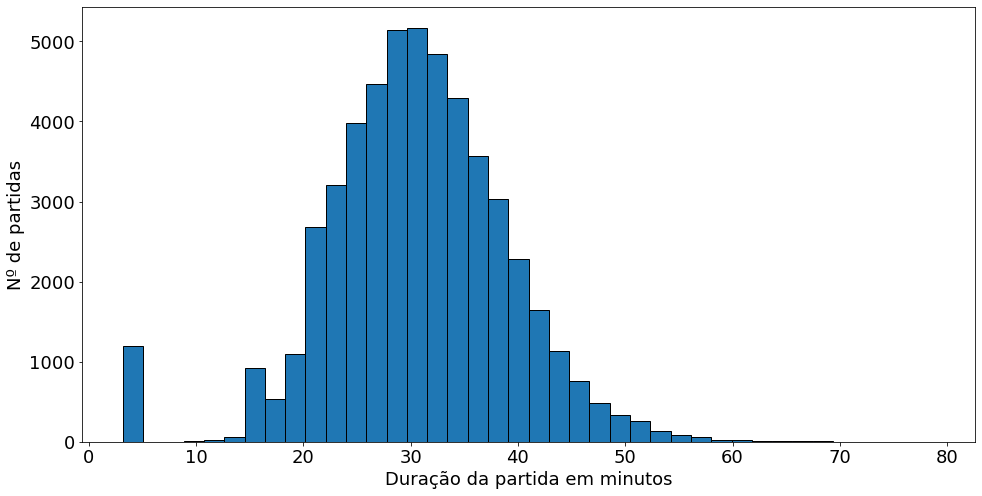

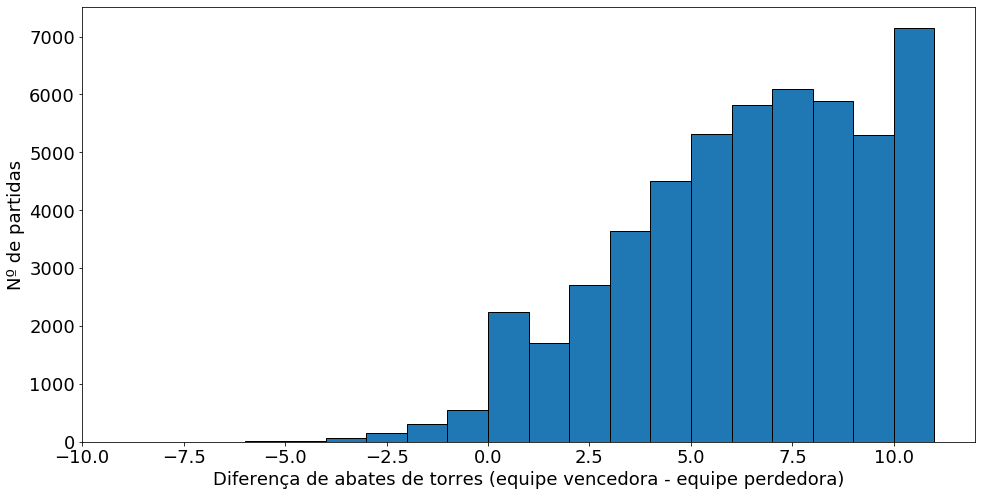

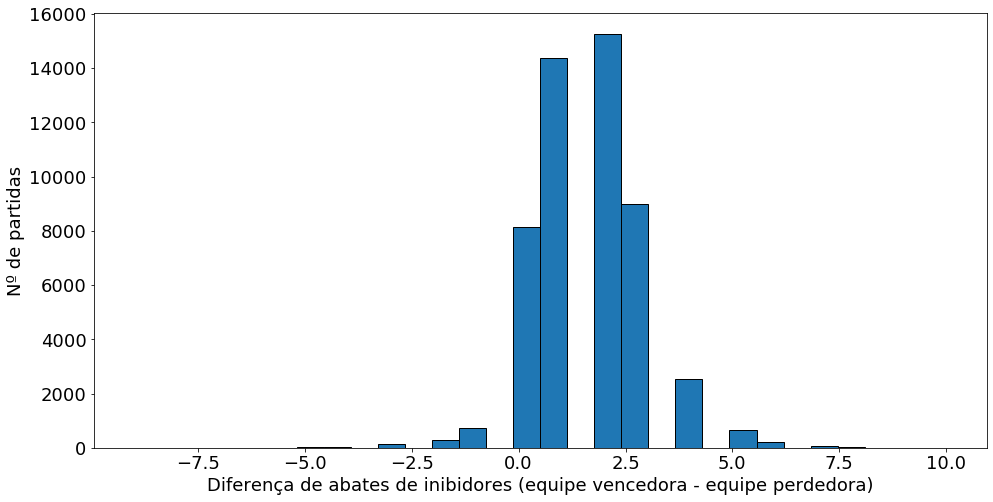

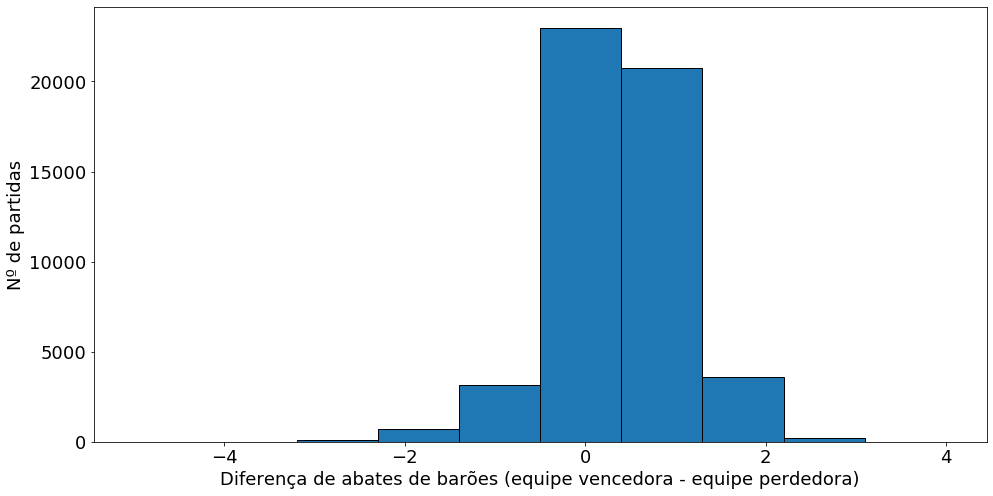

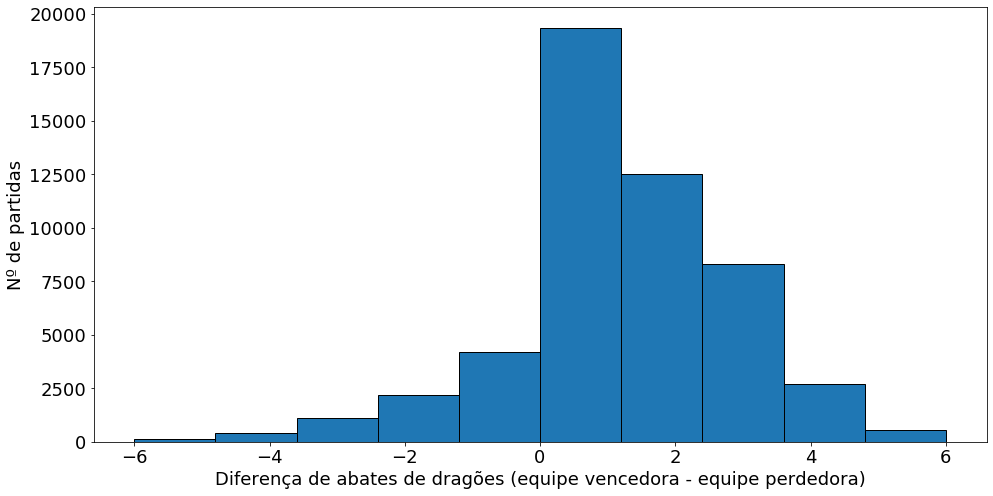

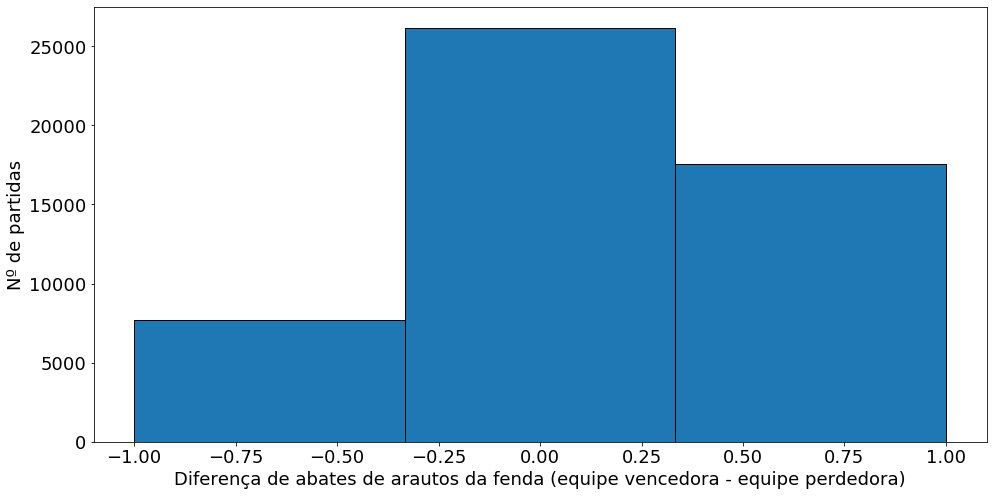

In [7]:
meu_plot(df['gameDuration']/60, 'Duração da partida em minutos', 'Nº de partidas', 40)
meu_plot(df['towerKillsDiff'], 'Diferença de abates de torres (equipe vencedora - equipe perdedora)', 'Nº de partidas', 20)
meu_plot(df['inhibitorKillsDiff'], 'Diferença de abates de inibidores (equipe vencedora - equipe perdedora)', 'Nº de partidas', 20)
meu_plot(df['baronKillsDiff'], 'Diferença de abates de barões (equipe vencedora - equipe perdedora)', 'Nº de partidas', 10)
meu_plot(df['dragonKillsDiff'], 'Diferença de abates de dragões (equipe vencedora - equipe perdedora)', 'Nº de partidas', 10)
meu_plot(df['riftHeraldDiff'], 'Diferença de abates de arautos da fenda (equipe vencedora - equipe perdedora)', 'Nº de partidas', 3)

In [8]:
def compara(atributo1, atributo2, pr=0):
    soma = (atributo1 == atributo2).sum()
    somaVazio = (atributo2 == 0).sum()
    n = atributo1.size
    porcentagem = round(soma*100/n,2)
    porcentagemVazio = round(somaVazio*100/n,2)
    if(pr):
        print("Em {}% das partidas as equipes '{}' também conseguem '{}'. {}% das partidas não ocorre '{}'"
              .format(porcentagem, atributo1.name, atributo2.name, porcentagemVazio, atributo2.name))
    return porcentagem

In [9]:
compara(df['winner'], df['firstBlood'], 1)
compara(df['winner'], df['firstTower'], 1);
compara(df['winner'], df['firstInhibitor'], 1);
compara(df['winner'], df['firstDragon'], 1);
compara(df['winner'], df['firstBaron'], 1);
compara(df['winner'], df['firstRiftHerald'], 1);
compara(df['winner'], df['firstTower'], 1);
compara(df['winner'], df['firstBaron'], 1);

Em 58.47% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.08% das partidas não ocorre 'firstBlood'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 80.0% das partidas as equipes 'winner' também conseguem 'firstInhibitor'. 12.19% das partidas não ocorre 'firstInhibitor'
Em 65.39% das partidas as equipes 'winner' também conseguem 'firstDragon'. 3.88% das partidas não ocorre 'firstDragon'
Em 48.94% das partidas as equipes 'winner' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'
Em 34.14% das partidas as equipes 'winner' também conseguem 'firstRiftHerald'. 50.84% das partidas não ocorre 'firstRiftHerald'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 48.94% das partidas as equipes 'winner' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'


Realizaremos a seguir um teste de permutação, no qual iremos aleatorizar quais foram as equipes vencedoras e repetir os mesmos experimentos várias vezes. Assim poderemos ter uma ideia do quão signitivativos foram nossos resultados.

In [10]:
def perm(atributo1, atributo2, it=500):
    
    lista = []
    taxaObs = compara(atributo1, atributo2, 1)
    srt1 = atributo1.name
    str2 = atributo2.name
    atributo1 = atributo1.copy()
    
    for i in range(it):
        atributo1 = np.random.permutation(atributo1)
        lista.append(compara(atributo1, atributo2, 0))

    plt.figure(figsize=(16, 8))
    plt.hist(lista, bins=30)
    plt.title("Partidas com equipes {} e {}".format(srt1, str2))
    plt.axvline(x=taxaObs,c='red')
    ax = plt.gca()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

Em 58.47% das partidas as equipes 'winner' também conseguem 'firstBlood'. 1.08% das partidas não ocorre 'firstBlood'
Em 69.15% das partidas as equipes 'winner' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 80.0% das partidas as equipes 'winner' também conseguem 'firstInhibitor'. 12.19% das partidas não ocorre 'firstInhibitor'


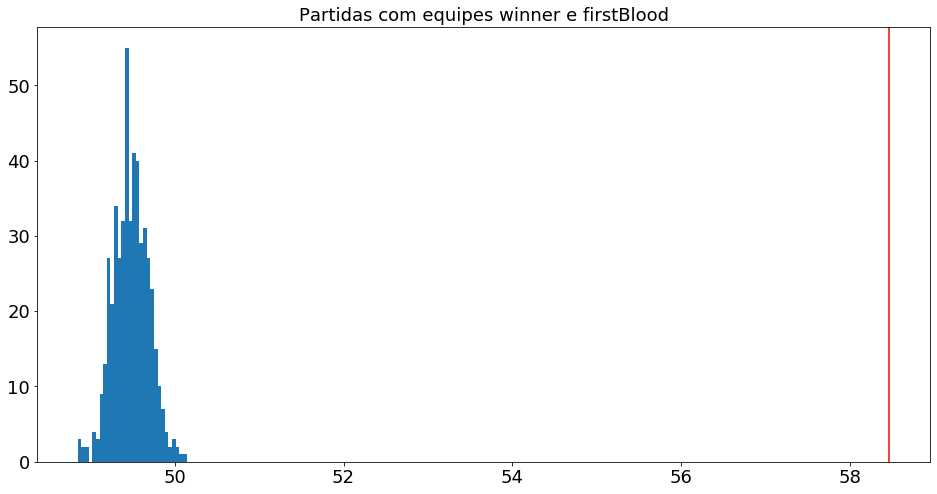

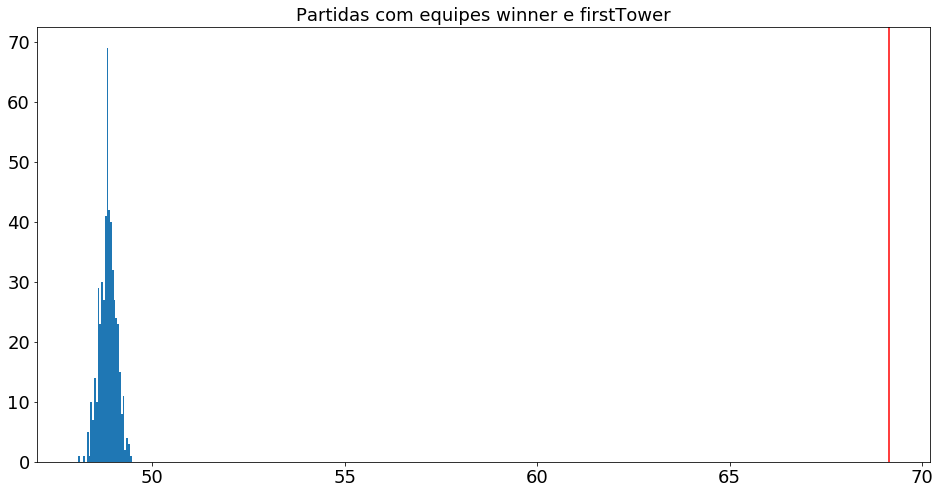

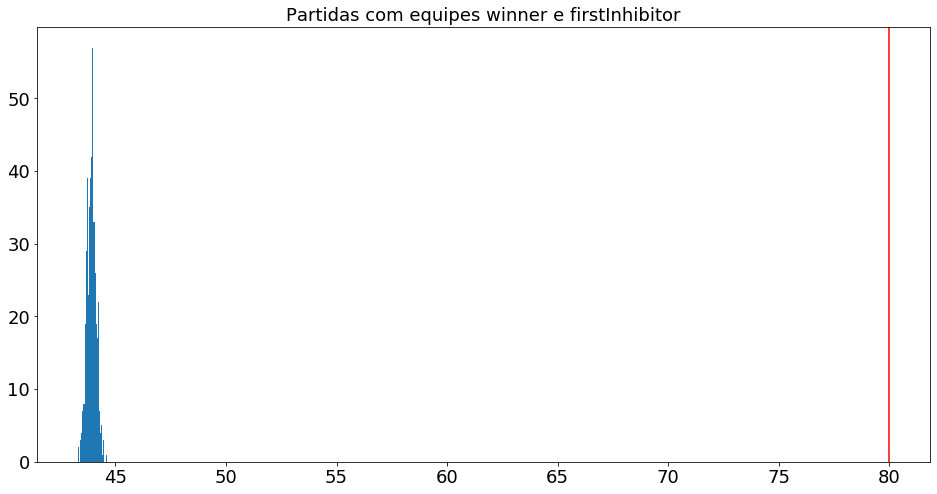

In [11]:
perm(df['winner'], df['firstBlood'])
perm(df['winner'], df['firstTower'])
perm(df['winner'], df['firstInhibitor'])

Em 60.22% das partidas as equipes 'firstBlood' também conseguem 'firstTower'. 2.36% das partidas não ocorre 'firstTower'
Em 30.24% das partidas as equipes 'firstBlood' também conseguem 'firstRiftHerald'. 50.84% das partidas não ocorre 'firstRiftHerald'
Em 34.27% das partidas as equipes 'firstBlood' também conseguem 'firstBaron'. 39.34% das partidas não ocorre 'firstBaron'


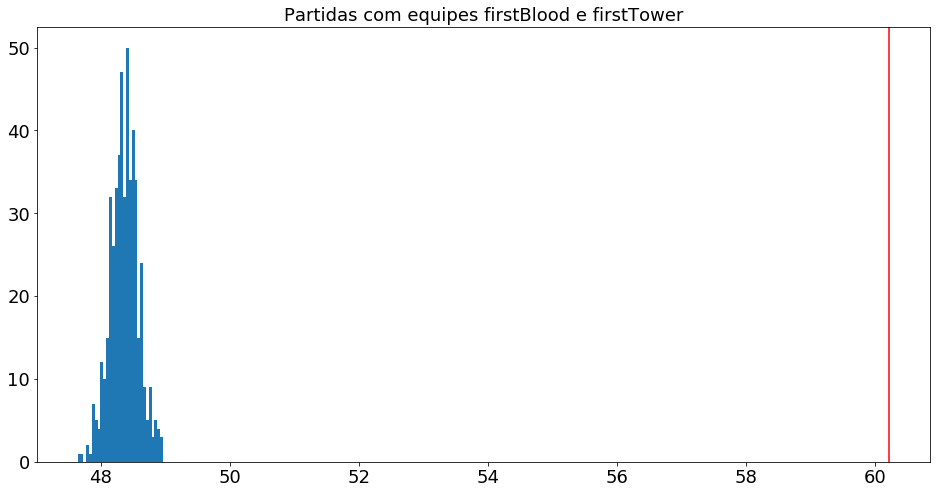

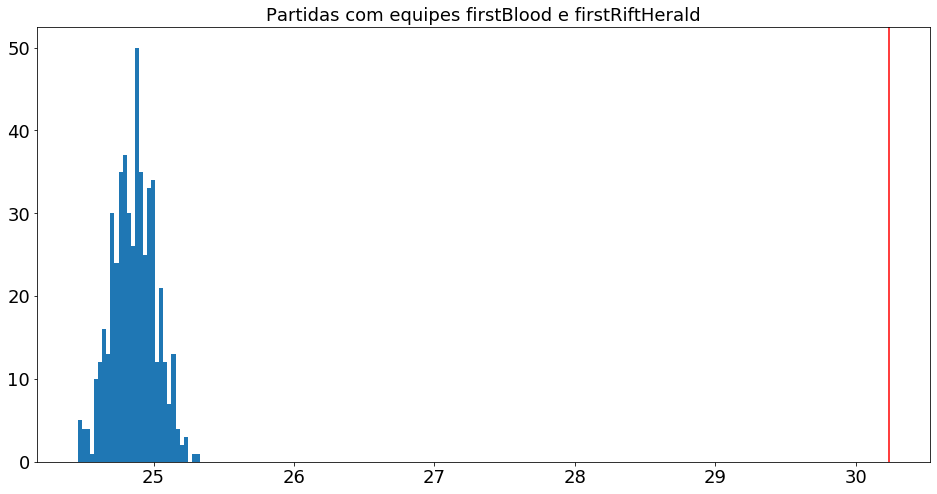

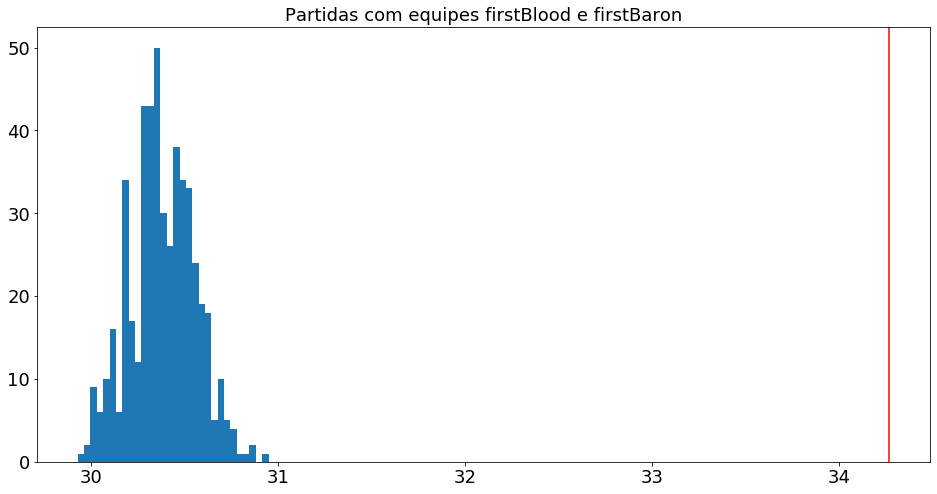

In [12]:
perm(df['firstBlood'], df['firstTower'])
perm(df['firstBlood'], df['firstRiftHerald'])
perm(df['firstBlood'], df['firstBaron'])

Regressão

In [13]:
# Análise da base
df = pd.read_csv('LeagueofLegends.csv')
df.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

In [14]:
# Separating variables
X = df['t1_champ1_sum2']
X

KeyError: 't1_champ1_sum2'

1- Estimar o gold do time de acordo com o número de objetivos, farm, kills feitos, além do tempo de partida.

In [43]:
# Utilizando a base de Campeonatos
df = pd.read_csv('games.csv')
# df['winner'].unique()
# gold = df['goldblue'][0].split(']')
# int(gold[0].split(', ')[-1])
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

Classificação

In [50]:
# Análise da base
df = pd.read_csv('games.csv')
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [84]:
df['t1_champ3_sum2']

0         7
1         3
2         4
3         7
4         3
         ..
51485    14
51486     4
51487     4
51488    12
51489    12
Name: t1_champ3_sum2, Length: 51490, dtype: int64

In [ ]:
1 - Classificar entre vencedor baseado objetivos feitos.

In [66]:
# Separando dados
X_t1 = df[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 'gameDuration']].copy()
X_t1

X_t2 = df[['t2_towerKills', 't2_inhibitorKills', 't2_baronKills',
       't2_dragonKills', 't2_riftHeraldKills', 'gameDuration']].copy()
X_t2
y = df[['winner']] - 1

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_t1, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(41192, 6)
(10298, 6)


In [69]:
# Z-Normaliza os dados
mean_train = X_train.mean()
std_train = X_train.std(ddof=1)

Z_train = X_train.copy()
Z_train = X_train - mean_train
Z_train = Z_train/std_train
Z_train

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,gameDuration
5777,0.604223,-0.015299,1.069056,0.507178,1.727891,-0.978256
3326,1.130149,2.353842,1.069056,1.335621,1.727891,0.381198
28932,1.393112,1.564128,-0.639376,1.335621,1.727891,0.240968
40241,1.130149,0.774415,-0.639376,-0.321265,-0.578726,-0.043388
16695,-0.973553,-0.805012,-0.639376,-1.149708,-0.578726,-0.053126
...,...,...,...,...,...,...
18454,0.604223,-0.015299,1.069056,1.335621,-0.578726,0.229282
32886,-0.710591,-0.805012,-0.639376,-0.321265,-0.578726,0.443523
1856,-0.184665,-0.805012,-0.639376,0.507178,-0.578726,1.596527
38090,-1.499479,-0.805012,-0.639376,-1.149708,-0.578726,-1.190549


In [72]:
# Mais imports
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_score

In [76]:
skf = StratifiedKFold(n_splits=5, shuffle = True)
fold = 1
for train_index, val_index in skf.split(Z_train, y_train):
    print('{}º fold'.format(fold))
    for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Z_train.values[train_index], y_train.values[train_index])

        y_val = y_train.values[val_index]
        y_hat = model.predict(Z_train.values[val_index])

        precision = precision_score(y_val, y_hat)
        print('{} cluster(s) com {}% de precisão'.format(k, round(precision,3)*100))
    print('')
    print('')
    fold += 1

1º fold
1 clusters com 0.918 de precisão
3 clusters com 0.935 de precisão
5 clusters com 0.945 de precisão
7 clusters com 0.948 de precisão
9 clusters com 0.949 de precisão
11 clusters com 0.951 de precisão
13 clusters com 0.953 de precisão
15 clusters com 0.949 de precisão
17 clusters com 0.947 de precisão
19 clusters com 0.946 de precisão
21 clusters com 0.947 de precisão


2º fold
1 clusters com 0.907 de precisão
3 clusters com 0.928 de precisão
5 clusters com 0.937 de precisão
7 clusters com 0.94 de precisão
9 clusters com 0.944 de precisão
11 clusters com 0.946 de precisão
13 clusters com 0.947 de precisão
15 clusters com 0.944 de precisão
17 clusters com 0.95 de precisão
19 clusters com 0.948 de precisão
21 clusters com 0.951 de precisão


3º fold
1 clusters com 0.922 de precisão
3 clusters com 0.935 de precisão
5 clusters com 0.938 de precisão
7 clusters com 0.942 de precisão
9 clusters com 0.945 de precisão
11 clusters com 0.947 de precisão
13 clusters com 0.949 de precisão
15 

2 - Classificar entre vencedor ou não baseado nos bans dos campeões.

In [80]:
# Separando dados
X = df[['t2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5']].copy()
X
y = df[['winner']] - 1

In [81]:
# Separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(41192, 5)
(10298, 5)


In [82]:
skf = StratifiedKFold(n_splits=5, shuffle = True)
fold = 1
for train_index, val_index in skf.split(X_train, y_train):
    print('{}º fold'.format(fold))
    for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train.values[train_index], y_train.values[train_index])

        y_val = y_train.values[val_index]
        y_hat = model.predict(X_train.values[val_index])

        precision = precision_score(y_val, y_hat)
        print('{} cluster(s) com {}% de precisão'.format(k, round(precision,3)*100))
    print('')
    print('')
    fold += 1

1º fold
1 cluster(s) com 49.6% de precisão
3 cluster(s) com 50.0% de precisão
5 cluster(s) com 49.9% de precisão
7 cluster(s) com 50.1% de precisão
9 cluster(s) com 50.1% de precisão
11 cluster(s) com 50.4% de precisão
13 cluster(s) com 50.4% de precisão
15 cluster(s) com 50.2% de precisão
17 cluster(s) com 49.9% de precisão
19 cluster(s) com 50.1% de precisão
21 cluster(s) com 49.8% de precisão


2º fold
1 cluster(s) com 49.4% de precisão
3 cluster(s) com 49.5% de precisão
5 cluster(s) com 48.9% de precisão
7 cluster(s) com 49.9% de precisão
9 cluster(s) com 50.0% de precisão
11 cluster(s) com 49.9% de precisão
13 cluster(s) com 49.3% de precisão
15 cluster(s) com 49.0% de precisão
17 cluster(s) com 48.8% de precisão
19 cluster(s) com 49.0% de precisão
21 cluster(s) com 48.5% de precisão


3º fold
1 cluster(s) com 49.5% de precisão
3 cluster(s) com 49.2% de precisão
5 cluster(s) com 49.4% de precisão
7 cluster(s) com 49.8% de precisão
9 cluster(s) com 49.1% de precisão
11 cluster(s) c